# Semantic Modeling

Let's begin by defining *Semantic Modeling*. From the textbook:
> Semantic modeling is a foundational approach in digital humanities and computer science, enabling the structured representation of knowledge. It serves as a bridge between various disciplines, providing a unified framework for understanding and analyzing information.

As any good humanities definiton should be, this one is full of jargon. I want to identify some key aspects of this definition and exand on them. 

First, what is "the structured representation of knowledge?" Throughout the course, DH students have been presented with some key ways to represent knowledge, which we will hope to make more concrete with this notebook. **Tables** and **Graphs** are the most common underlying structures for these representations.

When we refer to a "structure" in the phrase "underlying structure," we are in fact referring to the convenient operations which a organization of data allow us to do on said data. This might seem odd, prioritizing operations rather than actual organization, but we will see below how useful it is to describe structures as a set of convenient operations rather than by a set of axiomatic definitions. For example, the structure of a table allows us to quickly (and *conveniently*) look up values of attributes, whereas it is easier to look up the relations between attributes if we use a graph. Let's pause now to examine this in-practice.


# Tabular vs Graph Data: The MoMA Dataset

Let's look at two different ways of visualizing the same dataset. In the future, this can be replaced with a dataset from the DHLAB at EPFL. We will use the MoMA dataset, which is a dataset detailing their entire collection. We'll just use a subset to make these notebooks lighter-weight.

Our subset will be any artworks or artists whose nationality is "Swiss."



#### Review: Copywright Law 
The MoMA dataset is published under a CC0 license! In an earlier class, we went over these different licenses, etc. Here is an example of us putting that knowledge of licenses into practice by:
1. Looking up what a CC0 license is [here](https://creativecommons.org/publicdomain/zero/1.0/).
2. Realizing it means: 
> The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law.
3. Having fun with the data without reservation!

In [2]:
import pandas as pd


In [3]:
# Let's load the data
swiss_artists = pd.read_csv('Swiss_Artists.csv')
swiss_artworks = pd.read_csv('Swiss_Artworks.csv')

## Tabular Data
With tabular data, we can immediately see all the attributes of a specific object, and perform operations on those attributes. 
For example, we can *quickly* see what percentage of Swiss Artists in MoMA's collection are male. The same goes for any measurement on an attribute stored *across* data. Tabular data also works well when we are storing the self-similar objects in the database. "Artists" can generally be described by the same four or five attributes, but something as broad as "Artwork" needs many, potentially useless attributes: how do you describe a statue or a painting in the same attributes?

More importantly, how do you introduce a new attribute **or description of an attribute** -- namely, metadata -- into the table without bloating the data even further?

This is important for us as DH students since the objects which we often describe are linked by non-physical connections. How would one possibly put all the cultural objects in *Venice* without a giant table filled with NaNs?

Tables also make it difficult to see the relationships between specific data. While it is obvious how one would check the percentage of female Swiss artists in MoMA's collection, it is an order of magnitude more complicated to check which Swiss artists *could have possibly met each other.*

In [4]:
swiss_artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,149,Cuno Amiet,"Swiss, 1868–1961",Swiss,male,1868,1961,Q566797,500005153.0
1,314,Theo H. Ballmer,"Swiss, 1902–1965",Swiss,male,1902,1965,Q2416828,500060722.0
2,348,Maurice Barraud,"Swiss, 1889–1955",Swiss,male,1889,1955,NaN,NaN
3,355,Ruodi Barth,"Swiss, 1921–1999",Swiss,male,1921,1999,NaN,NaN
4,391,Otto Baumberger,"Swiss, 1889–1961",Swiss,male,1889,1961,Q121025,NaN


In [5]:
# What percentatge of the artists are male?
swiss_artists['Gender'].value_counts(normalize=True)*100

Gender
male      86.770428
female    13.229572
Name: proportion, dtype: float64

### Artworks

When we review our artworks table, the problems of tabular data start to show themselves. When you have a complex object under study, as is the case for any cultural data, *you will invariably have many attributes which might apply to one form of your data but not another.* When we look at the different columns for artworks, we see that many of them are NaN. For example, if a painting is square, the *Circumference* column isn't applicable. 

Another problem that emerges is *repeated data*: for every artwork by a specific artist, MoMA has stored the entire artist's row along with the artwork. For example, when we glance at the first five artworks, Mario Botta's ID, Bio, Nationality, and Gender repeat 5 times. 

## TL;DR
**When we store relations (such as "painted by") in tabular data, we introduce inconveniences and inefficiencies.**

In [6]:
swiss_artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ImageURL', 'OnView',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [7]:
swiss_artworks.head() 

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Gotthard Bank, Lugano, Switzerland, Perspective",Mario Botta,696,"(Swiss, born 1943)",(Swiss),(1943),(0),(male),1986,Pen and ink on paper,...,NaN,NaN,NaN,NaN,94.6,NaN,NaN,94.6,NaN,NaN
1,"Gotthard Bank, Lugano, Switzerland, Elevation",Mario Botta,696,"(Swiss, born 1943)",(Swiss),(1943),(0),(male),c.1985,Colored pencil on print,...,NaN,NaN,NaN,NaN,58.1,NaN,NaN,94.6,NaN,NaN
2,"Gotthard Bank, Lugano, Switzerland, West eleva...",Mario Botta,696,"(Swiss, born 1943)",(Swiss),(1943),(0),(male),1985,Color pencil on print,...,NaN,NaN,NaN,NaN,29.8,NaN,NaN,138.4,NaN,NaN
3,"Gotthard Bank, Lugano, Switzerland, Preliminar...",Mario Botta,696,"(Swiss, born 1943)",(Swiss),(1943),(0),(male),Unknown,Graphite on tracing paper,...,NaN,NaN,NaN,NaN,30.5,NaN,NaN,71.1,NaN,NaN
4,"Gotthard Bank, Lugano, Switzerland (Preliminar...",Mario Botta,696,"(Swiss, born 1943)",(Swiss),(1943),(0),(male),1982–1986,Graphite on tracing paper,...,NaN,NaN,NaN,NaN,30.5,NaN,NaN,27.3,NaN,NaN


In [8]:
# What kinds of artworks are there?
swiss_artworks['Classification'].value_counts()

Classification
Design              885
Illustrated Book    373
Print               361
Architecture        337
Video               218
Drawing             143
Photograph           92
Multiple             50
Sculpture            48
Painting             20
Installation          5
(not assigned)        5
Work on Paper         3
Audio                 2
Periodical            1
Textile               1
Name: count, dtype: int64

# Graph Data
Let's store the exact same data, Swiss Artists and Artworks in MoMA's collection, using a different underlying structure. **Graphs.** 

Graphs consist of two parts: **nodes** and **edges.**

These are typically defined from a mathematical perspective, but let's twist those definitions into something more applicable to Digital Humanities.
#### Nodes
Nodes are the *fixed points* of your data. When defining what they are, the digital humanist defines the core aspects of their data. In doing so, they add a hierarchy of structure. 

For our case, we will define the Nodes as the different columns present in our data. However, unlike in tables, **we want to avoid duplication of data.** Thus, if two pieces of art are made by the same artist, artist A, we should be able to reach both pieces of art if we begin from the same "artist A" node. We don't want multiple instances of "artist A" to exist in our graph.

**This is important because it shows us that we can define our Node types either *before* or *after* creating the graph. For our case, let's start by defining relationships between datapoints, and then see if those relationships imply a typology of nodes.** Let's just let each row be a specific "object:" those kernels which our data will form around. 

#### Edges
Edges are the *relations* which define your data. When we define the relationships of our data, we give structure to our fixed points. The Digital Humanist often intervenes in data by defining these relationships. 
**When we "do" digital humanities, it is often a matter of discovering and creating relationships between cultural datapoints, and then making inferences on the structure created by those relationships.**

So, let's define our relationships for the MoMA dataset. We can usually do this by converting a column in a table using the "has____" syntax. For example, if an artwork in row #N has a non-NaN value of "Circumference" of 5cm, then the Row #N node will have an out-edge hasCircumference, pointing to the node "5cm"

### Implementing Graphs
When implementing graphs, I (Clay) highly reccomends the python package [NetworkX](https://networkx.org/documentation/stable/index.html)

In [9]:
# let's clean the artworks data first.
# Remove any parentheses from all columns
swiss_artworks = swiss_artworks.applymap(
    lambda x: x.replace("(", "").replace(")", "") if isinstance(x, str) else x
)

# Cast any columns that are numbers to numbers
# Automatically convert numeric columns to appropriate numeric types
for col in swiss_artworks.columns:
    # Attempt to convert the column to numeric, ignoring errors
    swiss_artworks[col] = pd.to_numeric(swiss_artworks[col], errors='ignore')

/tmp/ipykernel_2855/3331180459.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  swiss_artworks = swiss_artworks.applymap(
/tmp/ipykernel_2855/3331180459.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  swiss_artworks[col] = pd.to_numeric(swiss_artworks[col], errors='ignore')


In [10]:
# Because most of the data is in the artworks dataset, we will first create the graph using that table, and then add the attributes from the artists table
import networkx as nx 

# The edge directions matter!
G = nx.DiGraph()


# Let's add the nodes
for idx, row in swiss_artworks.iterrows():
    # Let's create the node using the index, or the Row # in the dataframe
    G.add_node("#"+str(idx))

    # For each attribute, let's add an edge to the node. We don't want to duplicate attribute value nodes
    for column in row.index:
        # Not storing NaN values
        if pd.notna(row[column]):
            edgeName = "has"+column
            if row[column] not in G.nodes:
                G.add_node(row[column])
            G.add_edge("#"+str(idx), row[column], name=edgeName)

# Let's add the attributes from the artists table
for idx, row in swiss_artists.iterrows():
    if G.has_node(row['DisplayName']):
        for column in row.index:
            # print(column)
            if column == "DisplayName":
                continue
            if pd.notna(row[column]):
                edgeName = "has"+column
                if row[column] not in G.nodes:
                    G.add_node(row[column])
                G.add_edge(row['DisplayName'], row[column], name=edgeName)
        

Let's look at the "Mario Botta" node. We'll put all the in-nodes of Mario on the left, and all of Mario's out-nodes on the right. 

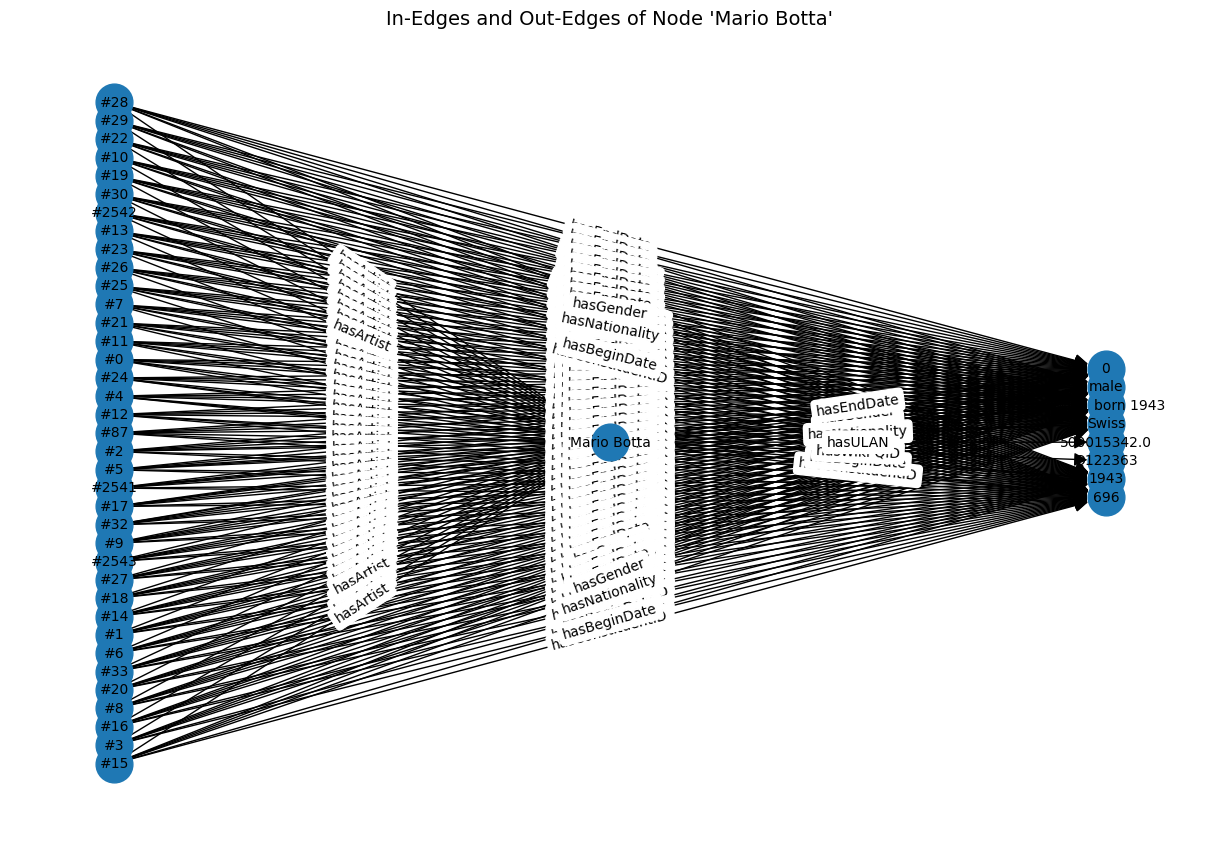

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

# Node of interest
node_of_interest = "Mario Botta"

def plot_in_out_nodes(node_of_interest, G=G):

    # Get in-edges and out-edges
    in_edges = G.in_edges(node_of_interest, data=True)
    out_edges = G.out_edges(node_of_interest, data=True)

    # Create a subgraph with the node of interest, its in-edge sources, and out-edge targets
    in_nodes = {u for u, _, _ in in_edges}  # Nodes with edges pointing to the node of interest
    out_nodes = {v for _, v, _ in out_edges}  # Nodes the node of interest points to
    all_nodes = {node_of_interest} | in_nodes | out_nodes
    subgraph = G.subgraph(all_nodes)

    # Create a custom layout
    pos = {}
    # Position the main node at the center
    pos[node_of_interest] = (0, 0)
    # Position in-edge nodes on the left
    for i, node in enumerate(in_nodes):
        pos[node] = (-1, len(in_nodes) / 2 - i)
    # Position out-edge nodes on the right
    for i, node in enumerate(out_nodes):
        pos[node] = (1, len(out_nodes) / 2 - i)

    # Draw the subgraph
    plt.figure(figsize=(12, 8))
    nx.draw(subgraph, pos, with_labels=True, node_size=700, font_size=10, arrowsize=20)

    # Draw edge labels to indicate relationships
    edge_labels = nx.get_edge_attributes(subgraph, "name")
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

    plt.title(f"In-Edges and Out-Edges of Node '{node_of_interest}'", fontsize=14)
    plt.show()

plot_in_out_nodes(node_of_interest)


Ok, so it looks like our artworks (the numbered edges on the left) have the same attributes as MarioBotta. This makes sense, as we got those attributes from Mario! Although our graph looks a bit odd, we should resist the urge to avoid this "duplication." In fact, this image helps us understand two key differences of graphs from tables:
1. Visualizations from Graphs are often carry much more semantic intuition.
2. Whereas tables duplicate values, graphs duplicate edges.

Let's use this duplication to plot a similar graph for the year '1943'

If we use this setup, we get relationships for free! For example, when we look at the in-edges for the node corresponding to "1943", we can see both Artworks and Artists connected to the year. Artists with "hasBeginDate" and Artworks with "HasBeginDate"

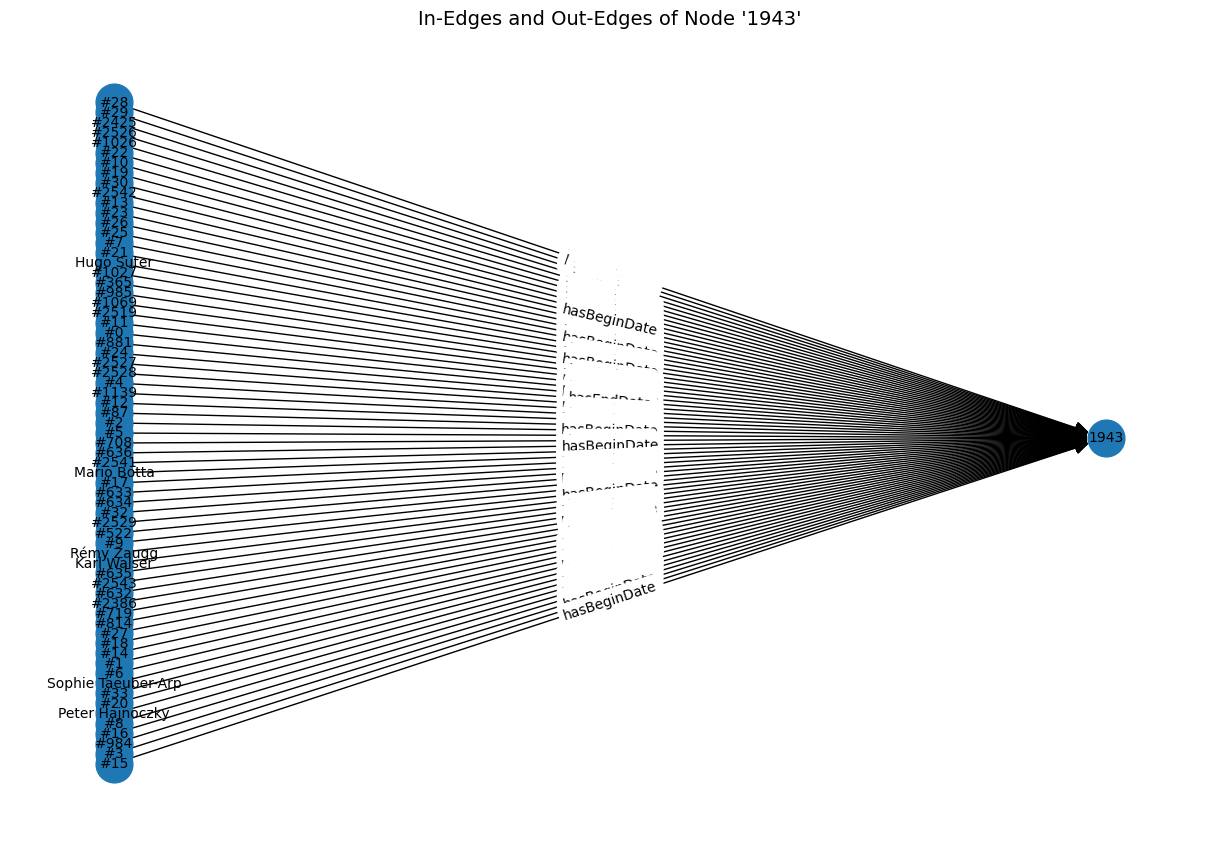

In [12]:
node_of_interest = 1943
plot_in_out_nodes(node_of_interest)


## How Graphs Reveal Hidden Aspects of Our Data

Now, how we would store or add metadata is obvious. In fact, metadata is endemic to graphs. 

**Unlike with tabular data, our span of possible operations include operations on/involving metadata.** For example, which nodes have the highest centrality in our graph? Does this reveal anything about what ties all of these nodes together?

In [13]:
centrality = nx.degree_centrality(G)  # You can use other centrality measures as needed

# Sort nodes by centrality value in descending order
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 nodes
top_10_nodes = sorted_centrality[:10]

# Print the top 10 nodes and their centrality
print("Top 10 nodes by centrality:")
for node, cent_value in top_10_nodes:
    print(f"Node: {node}, Centrality: {cent_value:.4f}")

Top 10 nodes by centrality:
Node: Swiss, Centrality: 0.1261
Node: Y, Centrality: 0.1074
Node: male, Centrality: 0.1064
Node: 0, Centrality: 0.0793
Node: Architecture & Design, Centrality: 0.0651
Node: Drawings & Prints, Centrality: 0.0503
Node: Design, Centrality: 0.0471
Node: , Centrality: 0.0281
Node: N, Centrality: 0.0281
Node: Unidentified Designer, Centrality: 0.0227


Some of these attributes are remnants of bookkeeping, such as Y and N, but others *conveniently* reveal aspects of our data just by exploiting the structure of graphs. For example:
1. Sitting at the top of our nodes, "Swiss" is in fact what links all of these nodes together! If we were given this dataset without knowing what sits at the morphological center, we just derived it.
2. The centrality of "Male" is another telling aspect for our data. **Whereas with tabular data we had to formualte a specific question about the gender of these artists, graphs revealed to us this aspect of our data without us asking.** 
3. Categories like "Architecture & Design," "Drawing & Prints," and "Design" are in fact what Swiss art is famous for around the world. Storing our data in a graph revealed to us the importance of these fields/mediums without us formulating an explicit query.

# Deriving RDF Triplets
Now that we have created our graph, we want to store it for later. The simplest way to describe our graph is a list of edges. Let's quickly print those out for any nodes connected to the node "Mario Botta."

In [14]:
# Specify the node of interest
node_of_interest = "Mario Botta"

# Get in-edges of the node
in_edges = G.in_edges(node_of_interest, data=True)  # Include edge data if needed
out_edges = G.out_edges(node_of_interest, data=True)  # Include edge data if needed

# Print the in-edges
print(f"In-edges of node '{node_of_interest}':")
for u, v, data in in_edges:
    edge_name = data.get('name', 'unnamed')  # Get edge 'name', default to 'unnamed' if not present
    print(f"({u}) --[{edge_name}]--> ({v})")

# Print the out-edges
print(f"In-edges of node '{node_of_interest}':")
for u, v, data in out_edges:
    edge_name = data.get('name', 'unnamed')  # Get edge 'name', default to 'unnamed' if not present
    print(f"({u}) --[{edge_name}]--> ({v})")


In-edges of node 'Mario Botta':
(#0) --[hasArtist]--> (Mario Botta)
(#1) --[hasArtist]--> (Mario Botta)
(#2) --[hasArtist]--> (Mario Botta)
(#3) --[hasArtist]--> (Mario Botta)
(#4) --[hasArtist]--> (Mario Botta)
(#5) --[hasArtist]--> (Mario Botta)
(#6) --[hasArtist]--> (Mario Botta)
(#7) --[hasArtist]--> (Mario Botta)
(#8) --[hasArtist]--> (Mario Botta)
(#9) --[hasArtist]--> (Mario Botta)
(#10) --[hasArtist]--> (Mario Botta)
(#11) --[hasArtist]--> (Mario Botta)
(#12) --[hasArtist]--> (Mario Botta)
(#13) --[hasArtist]--> (Mario Botta)
(#14) --[hasArtist]--> (Mario Botta)
(#15) --[hasArtist]--> (Mario Botta)
(#16) --[hasArtist]--> (Mario Botta)
(#17) --[hasArtist]--> (Mario Botta)
(#18) --[hasArtist]--> (Mario Botta)
(#19) --[hasArtist]--> (Mario Botta)
(#20) --[hasArtist]--> (Mario Botta)
(#21) --[hasArtist]--> (Mario Botta)
(#22) --[hasArtist]--> (Mario Botta)
(#23) --[hasArtist]--> (Mario Botta)
(#24) --[hasArtist]--> (Mario Botta)
(#25) --[hasArtist]--> (Mario Botta)
(#26) --[hasArti

In fact, we could store our entire dataset using these "triplets." From the textbook:
> The core of semantic graphs is the **RDF (Resource Design Framework)** which organizes information into **triplets: Subject Predicate Object.** Each triplet represents a fact or statement, where: the **subject** denotes the resource, the **predicate** specifies a trait or relationship, and the **object** denotes the value or related entity.

Because we first created our relational database and then defined the concept of **RDF** triplets, they seem completely natural to us. Let's take a specific triplet as a working example:
> (Mario Botta) --[hasWiki QID]--> (Q122363)
In this case, we can break down the triplet into our subject-predicate-object format.

| Subject | Predicate | Object |
| ------- | --------- | ------ |
| Mario Botta | hasWiki QID | Q122363 | 

Thus, when we are working with **RDF Triplets,** we are essentially just working with Graphs!

#### Storing RDFs

There are multiple ways to store RDFs. Any way you can store a graph, you can store an RDF. The FDH Textbook mentions the following methods for RDF Serialization:
- **RDF/XML**: The most widely used format.
- **Turtle**: Human readable and compact.
- **JSON-LD**: JSON based, widely adopted in web technologies.
- **N-Triples and N-Quads**: Line-based formats for single or multiple graphs.
- **HDT**: A compact and binary format for large datasets. 

## Combining Semantic Graphs - Identifiers
If we have multiple graphs which contain different information about the same objects, we need a way to relate the two together. For example, let's split our "Swiss Artworks" dataset into two graphs: `Artworks` and `Artists` using the same methodology as earlier.

In [15]:
Artworks = nx.DiGraph()

# Let's add the nodes
for idx, row in swiss_artworks.iterrows():
    # Let's create the node using the index, or the Row # in the dataframe
    Artworks.add_node("#"+str(idx))

    # For each attribute, let's add an edge to the node. We don't want to duplicate attribute value nodes
    for column in row.index:
        # Not storing NaN values
        if pd.notna(row[column]):
            edgeName = "has"+column
            if row[column] not in Artworks.nodes:
                Artworks.add_node(row[column])
            Artworks.add_edge("#"+str(idx), row[column], name=edgeName)

In [16]:
Artists = nx.DiGraph()

# Let's add the nodes
for idx, row in swiss_artists.iterrows():
    # Let's create the node using the index, or the Row # in the dataframe
    Artists.add_node("#"+str(idx))

    # For each attribute, let's add an edge to the node. We don't want to duplicate attribute value nodes
    for column in row.index:
        # Not storing NaN values
        if pd.notna(row[column]):
            edgeName = "has"+column
            if row[column] not in Artists.nodes:
                Artists.add_node(row[column])
            Artists.add_edge("#"+str(idx), row[column], name=edgeName)

Now we have two graphs. It's easy to imagine a scenario where this would happen. For example: two different museums offer their collections in two different ways: one publishes data about the Artists in their collection, while the other publishes data bout the Artworks.

Regardless of the scenario, we are now faced with the (realistic) case where the node "#0" in `Artworks` refers to an actual artwork (The Gotthard Bank Building), wheras the node "#0" in `Artists` refers to an artist (Cuno Amiet). Remember, we are adding nodes according to how they relate to their row number. Let's plot both of those nodes to show what I mean:

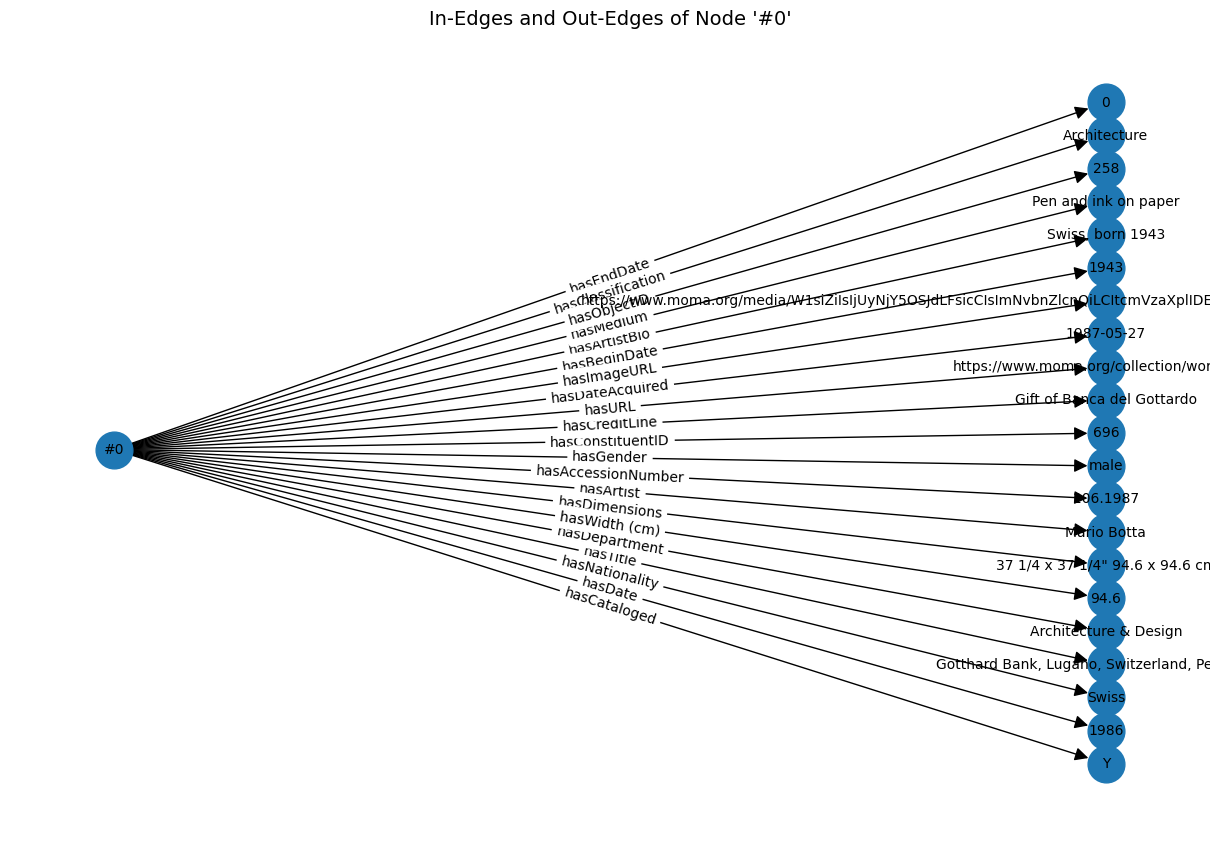

In [23]:
plot_in_out_nodes('#0', G=Artworks)

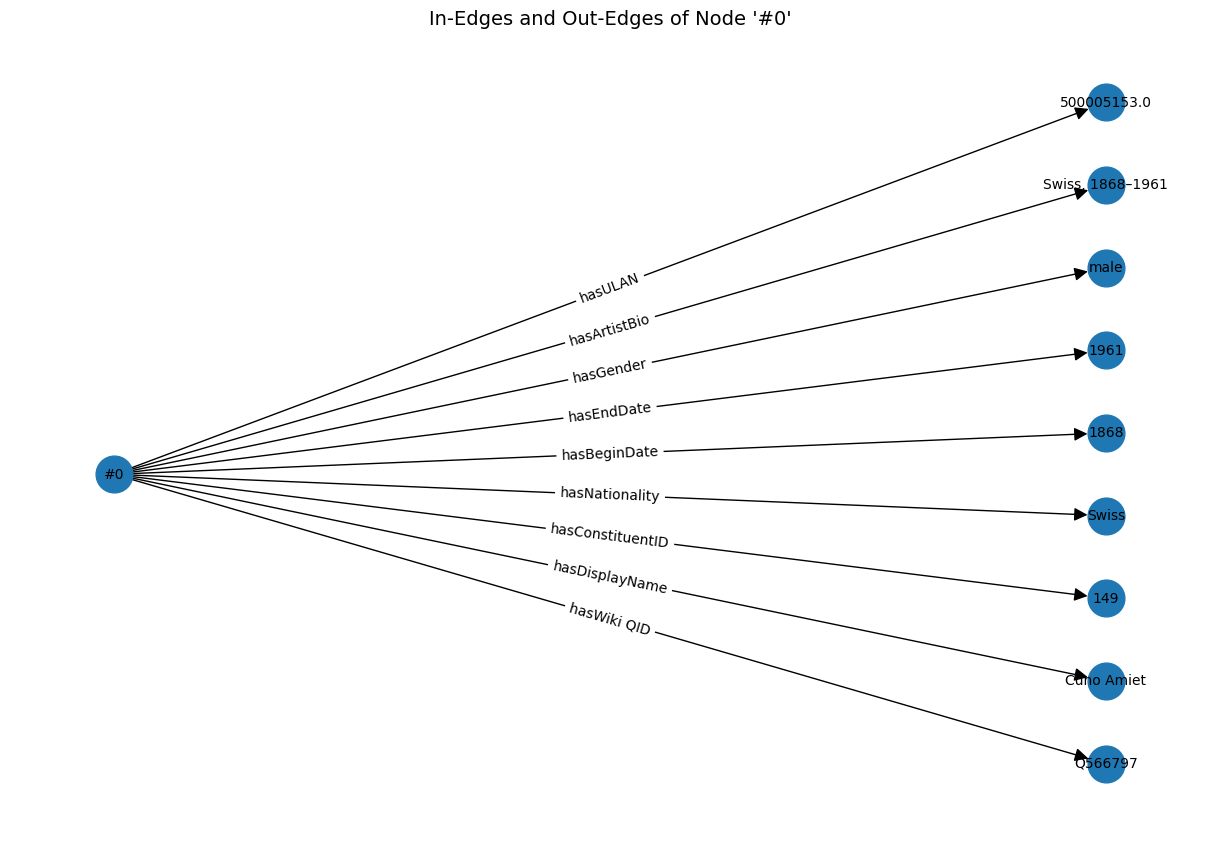

In [24]:
plot_in_out_nodes('#0', G=Artists)

So, we can have two different representations of the same object in two graphs. In the case of these graphs, it is *Artists* which are represented twice. How do we know that the "Cuno Amiet" in our `Artists` database is the same "Cuno Amiet" who is marked as the artist of the "Portrait of Germaine Richier" in our `Artworks` database? **This is the motivation for Identifiers**

### Identifiers
From the FDH Textbook:
> When coordinating multiple datasets, ensuring unique and consistent identifiers is essential.
**RDF** uses multiple kinds of **Universal Resource Indicators:
- **URL (Universal Resource Locator)** locates a resource (e.g. web pages)
- **URI (Uniform Resource Identifier)** ASCII-based web identifiers for web entities
- **IRI (Internationalized Resource Identifier)** Unicode-based identifiers for broader language support.


## Vocabularies
When using multiple different datasets, we need a common vocabulary so we can combine them. In our case, both datasets use the same vocabulary. However, what if our `Artists` dataset described the `ArtistBio` as `Biography` and the `Artworks` dataset used the already-existing `ArtistBio`? In this case there isn't that much ambiguity, but combining datasets with different vocabularies is a pain. It also becomes a real problem when terms **are** ambiguous.

Thus, the textbook defines vocabularies as:
> RDF vocabularies are sets of URI references used to define terms and relationships.

In our case, this means the nodes and the relationships between them are standardized. We've been employing the vocabulary defined by MoMA when they collected and compiled this data. But, we had to come up with our own predicates by converting the column names to predicates. S**o, shouldn't there be a larger version of a vocabulary, one that encompasses more than the needs of a single dataset?**

## Ontologies
According to the textbook:
> An **ontology** is an advanced vocabulary that formalizes relationships, properties, and entities in a domain. Ontologies are expressed as RDF triples and enrich datasets with semantic depth.

Thus, an ontology is a more comprehensive version of a vocabulary which makes explicit the RDF framework. **In our case, an ontology would segment the different nodes into specific types.** For example, all the nodes which contain names of artists or artworks would be "Name" nodes. We could also use ontologies to clearly define what constitutes a single object. If we use ontologies, we can discard our previous decision of "one row = one object" and base our idea of "object" around what these ontologies define as an object. For example, if our ontology is focused around "people", then we can create our graph using "people" as the starting points. In our case, this means extracting all of the artists in both datasets, iterating over them, and adding their created artworks and data. As we see in the next chapter, different kinds of ontologies exist, such as **event-centric** ontologies.

I won't be implementing ontologies here, as they are the focus of the next chapter.

## Metaknowledge and Triplets

We also might want to include metaknowledge about our triplets. In the case of our dataset, this might be the name of the archivist who entered a specific entry in our dataset. I'll demonstrate the theory of "Reified Triplets" and then show how we might do this in practice using NetworkX.

Let's take our eariler triplet:

| Subject | Predicate | Object |
| ------- | --------- | ------ |
| Mario Botta | hasWiki QID | Q122363 | 

And let's say this was entered by our good friend `Archivist X`. In order to incorporate this metaknowledge in **RDF** format, we can re-write the original triplet as a collection of three "reified" triplets. First, we begin by naming the triplet "T1". After representing a single triplet as a collection of three triplets, we can add as much "metaknowledge" or metadata about that triplet as we want.

| Subject | Predicate | Object |
| ------- | --------- | ------ |
| T1 | hasSubject | Mario Botta | 
| T1 | hasPredicate | hasWiki QID | 
| T1 | hasObject | Q122363 | 
| T1 | hasArchivist | Archivist X | 

Let's look how I can add attributes to edges in NetworkX:


In [ ]:
# Let's get a specific edge: from the first artwork to it's title.
e = G.edges[('#0', 'Gotthard Bank, Lugano, Switzerland, Perspective')]

e

{'name': 'hasTitle'}

In [41]:
# This edge is simply a dict, so we can add an attribute the same way we add values to a dict:
e['hasArchivist'] = "Archivist X"

e

{'name': 'hasTitle', 'hasArchivist': 'Archivist X'}



### About this Notebook
This notebook hopes to actualize some of the concepts described in the lectures and textbooks of EPFL's *Foundation of Digital Humanities.* It is a jupyter notebook version of "Chapter 24: Semantic Modeling" in the class' textbook.

##### Notebook Author's Note: Clay Foye
I have tried my best to not modify the course materials with my own interpretation of them. Despite my own disagreements with some of the ways concepts are presented, I tried to present them faithfully to the course in order to make these notebooks as useful as possible.

##